# CS109b Final Project

# Milestone1

by Danqing Wang, Wenshan Zheng, Zecai Liang
______________

In [46]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 1. Data Extraction


### 1.1 Accessing TMDB and IMDB Data

#### 1.1.1 API code to access the genre and movie poster your favorite movie from TMDB

In [ ]:
# import libraries
import urllib
from bs4 import BeautifulSoup
import time
import re
import tmdbsimple as tmdb
tmdb.API_KEY = '4074d0170761c40d9c07d9016ddd4965'

In [2]:
# set up some basic url link strings, to be used later
APIKeyZ = "api_key=4074d0170761c40d9c07d9016ddd4965"
base_url_search = "https://api.themoviedb.org/3/discover/movie?"
popular_desc = "&sort_by=popularity.desc"
year =  "&primary_release_year={}"
page_number = '&page={}'
query_url = 'https://api.themoviedb.org/3/movie/{}?'
poster_url = "http://image.tmdb.org/t/p/{size}/{path}"
poster_size = ["w92", "w154", "w185", "w342", "w500", "w780", "original"]

In [3]:
# use Beauty and Beast (released in 2017) as an example
movie_name = "beauty and the beast"
# set up the link to search for the movie
movie_url = base_url_search + APIKeyZ + "&query=" + movie_name + year.format(2017)

# take out the TMDB ID and extract details about the movie
page = urllib.urlopen(movie_url).read()
soup = BeautifulSoup(page, "lxml")
prettified = soup.prettify()
id_index = prettified.find('"id"') #find the index for TMDB ID
# Extract ID information
j_beginning = 5
movie_id = ''
while (prettified[id_index + j_beginning].isdigit()):
    movie_id += str(prettified[id_index + j_beginning])
    j_beginning += 1
print "Movie ID is:", movie_id

Movie ID is: 321612


In [4]:
# search movie by ID and access genres
movie = tmdb.Movies(movie_id)
response = movie.info()
movie.genres # seems that it returns genre id and corresponding genre

[{u'id': 14, u'name': u'Fantasy'},
 {u'id': 10402, u'name': u'Music'},
 {u'id': 10749, u'name': u'Romance'}]

In [5]:
# download movie poster
f = open('Beauty_and_Beast.jpg','wb')
f.write(urllib.urlopen(poster_url.format(size = poster_size[6], path = str(movie.poster_path))).read())
f.close()
poster_url.format(size = poster_size[6], path = str(movie.poster_path))

'http://image.tmdb.org/t/p/original//tWqifoYuwLETmmasnGHO7xBjEtt.jpg'

#### 1.1.2 Extract genre and other information for this movie from IMDb

In [6]:
## Danqing

#### 1.1.3 A list of the 10 most popular movies of 2016 from TMDb, and their genre obtained via the API, and confirm if the genre is consistent with IMDB data

In [7]:
# first extract TMDB ID of each movie, then use package tmdbsimple to obtain genre information
popular_movies_2016 =  base_url_search + APIKeyZ + popular_desc + year.format(2016)
page = urllib.urlopen(popular_movies_2016).read()
soup = BeautifulSoup(page, "lxml")
prettified = soup.prettify()
movie_list = [m.start() for m in re.finditer('"id"', prettified)] # this finds all indexes of occurences of "id"
movie_id_list = []
for i in range(10):
    i_beginning = 5
    movie_id_temp = ''
    while (prettified[movie_list[i] + i_beginning].isdigit()):
        movie_id_temp += str(prettified[movie_list[i] + i_beginning])
        i_beginning += 1
    movie_id_list += [int(movie_id_temp)]

In [8]:
movie_data = [] # to store movie information
for i in range(len(movie_id_list)):
    movie = tmdb.Movies(movie_id_list[i])
    response = movie.info()
    movie_data += [response]

In [9]:
# Extract IMDB ID
IMDB_ID = []
for i in range(len(movie_data)):
    IMDB_ID += [int(str(movie_data[i]['imdb_id'])[2:])]

In [10]:
TMDB_genre_list = [] # to store genre information from TMDB
for i in range(len(movie_data)):
    genre_temp = []
    for k in range(len(movie_data[i]['genres'])):
        genre_temp += [str((movie_data[0]['genres'][k]['name']))]
    TMDB_genre_list += [genre_temp]
TMDB_genre_list

[['Animation', 'Comedy', 'Drama', 'Family', 'Music'],
 ['Animation', 'Comedy', 'Drama'],
 ['Animation', 'Comedy', 'Drama', 'Family'],
 ['Animation', 'Comedy'],
 ['Animation', 'Comedy', 'Drama', 'Family'],
 ['Animation', 'Comedy'],
 ['Animation', 'Comedy', 'Drama', 'Family'],
 ['Animation', 'Comedy'],
 ['Animation', 'Comedy', 'Drama', 'Family'],
 ['Animation', 'Comedy', 'Drama', 'Family']]

_______________________

### 1.2 Larger Scale: Extract Top 500 Movies

#### 1.2.1 Extract Top 500 Movies from TMDB

In [62]:
# Wenshan

#### 1.2.2 Extract Data of the Same Top 500 Movies from IMDB

In [ ]:
# Danqing

----------------------------------------------

## 2. Exploratory Analysis 

Next, we want to take a look at the two database about the most popular 500 movies, and perform some exploratory analysis. 

The data from TMDB is saved locally as "TMDB_data.txt", and the data from IMDB is saved locally as "IMDB_data.txt".

### 2.1 Genre

#### 2.1.1 Genre Information from the IMDB Website

We know from the IMDB website (http://www.imdb.com) that the website categorize movies into 27 genres, as seen in the following picture:
<img src="IMDB_web_genre.PNG">

We saved the information to a local file "IMDB_web_genre.txt", and would compare the information on the website to the two dataset we extracted from TMDB and IMDB.

In [13]:
top500_IMDB_web = pd.read_csv('IMDB_web_genre.csv')

In [15]:
top500_IMDB_web.head()

,Genre,Count
0,Drama,1027694
1,Romance,279500
2,Short,171957
3,Comedy,149370
4,Crime,113705


---
#### 2.1.2 Genre Information from the IMDB Database
Next we calculate the genre information from the [top 500 movie data] (saved as "IMDB_data.txt") sampled from IMDB database.

In [53]:
## data frame extracted from IMDB by movieID (top-500 in TMDB)
top500_IMDB = pd.read_csv("IMDB_data.txt")

top500_IMDB.columns.values

array(['Unnamed: 0', 'title', 'genres', 'director', 'distributors', 'year',
       'rating', 'votes', 'runtimes', 'language codes', 'languages',
       'producer', 'mpaa', 'writer', 'top 250 rank', 'kind',
       'country codes', 'countries', 'cover url', 'aspect_ratio',
       'production companies', 'cinematographer', 'plot outline', 'plot',
       'cast', 'animation department', 'original music', 'canonical title',
       'editorial department', 'canonical title.1', 'long imdb title',
       'long imdb canonical title', 'smart canonical title',
       'smart long imdb canonical title', 'full-size cover url', 'imdb_ids'], dtype=object)

#### Parse `genres` into dummy coding


In [54]:
## ideally coule package this code into a function of spliting all variables, input:
# 1. head and tail characters to delet
# 2. split by

gr = top500_IMDB.ix[:, 'genres']

## Split variable `Genres` into list of strings

for i in range(len(gr)):
        # each row in 'genres' column
    st = gr[i]
#### -------------------------- for spliting other variables, change here -------------------------
        # delete the first three character " [u' ", and the last two charactor " '] "
        # split by " ' u "
    ls = st[3:-2].split("', u'") 
        # return a list to the 'genres' column
    gr[i] = ls
    
top500_IMDB_genre = pd.DataFrame(gr)["genres"].str.join(sep='*').str.get_dummies(sep='*')
top500_IMDB_genre['imdb_id'] = top500_IMDB['imdb_ids']

top500_IMDB_genre.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,imdb_id
0,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,2771200
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,3315342
2,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3470600
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3731562
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,369610


In [165]:
## count number of labels for each genre
top500_IMDB_genre_count = top500_IMDB_genre.sum(axis = 0)[:-1]
top500_IMDB_genre_count.head()

Action       210
Adult          1
Adventure    220
Animation     55
Biography     22
dtype: int64

In [166]:
## save as local files
top500_IMDB_genre.to_csv('IMDB_split_genre.txt') # include 'imdb_id'
top500_IMDB_genre_count.to_csv('IMDB_split_genre_count.txt')

---
#### 2.1.2 Genre Information from the IMDB Database
Similarly we organize the genre information from the [top 500 movie data] (saved as "TMDB_data.txt") sampled from TMDB database.

In [58]:
## data frame extracted from TMDB by movieID
top500_TMDB = pd.read_csv("TMDB_data.txt")

top500_TMDB.columns.values

array(['Unnamed: 0', 'poster_path', 'production_countries', 'revenue',
       'overview', 'video', 'id', 'genres', 'title', 'tagline',
       'vote_count', 'homepage', 'belongs_to_collection',
       'original_language', 'status', 'spoken_languages', 'imdb_id',
       'adult', 'backdrop_path', 'production_companies', 'release_date',
       'popularity', 'original_title', 'budget', 'vote_average', 'runtime'], dtype=object)

In [59]:
## ideally coule package this code into a function of spliting all variables, input:
# 1. head and tail characters to delet
# 2. split by

gr = top500_TMDB.ix[:, 'genres']

## Split variable `Genres` into list of strings
 
for i in range(len(gr)):
        # each row in 'genres' column
    st = gr[i]
#### -------------------------- for spliting other variables, change here -------------------------
        # delete the first three character " [u' ", and the last two charactor " '] "
        # split by " ' u "
    ls = st[3:-2].split("', u'") 
        # return a list to the 'genres' column
    gr[i] = ls
    
top500_TMDB_genre = pd.DataFrame(gr)["genres"].str.join(sep='*').str.get_dummies(sep='*')
top500_TMDB_genre['imdb_id'] = top500_IMDB['imdb_ids']

top500_TMDB_genre.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,imdb_id
0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2771200
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,3315342
2,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,3470600
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,3731562
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,369610


In [163]:
## count number of labels for each genre
top500_TMDB_genre_count = top500_TMDB_genre.sum(axis = 0)[:-1]
top500_TMDB_genre_count.head()

Action       217
Adventure    190
Animation     54
Comedy       101
Crime         73
dtype: int64

In [164]:
## save as local files
top500_TMDB_genre.to_csv('TMDB_split_genre.txt') # include 'imdb_id'
top500_TMDB_genre_count.to_csv('TMDB_split_genre_count.txt')

---
#### 2.1.3 Basic statistics about genre

#### Q. How many genres in total? 
Check the differences between the three information sources: IMDB website, IMDB database, TMDB database.

In [63]:
## total number of genres
print "Total Number of Genres from the IMDB website:", top500_IMDB_web.shape[0]
print "Total Number of Genres from the IMDB database:" , (top500_IMDB_genre.shape[1] - 1)
print "Total Number of Genres from the TMDB database:" , (top500_TMDB_genre.shape[1] - 1)

Total Number of Genres from the IMDB website: 27
Total Number of Genres from the IMDB database: 23
Total Number of Genres from the TMDB database: 19


In [92]:
set1 = top500_IMDB_web.loc[:,"Genre"].values
set2 = top500_IMDB_genre.columns.values[:-1]
set3 = top500_TMDB_genre.columns.values[:-1]

print "Baseline Genres from TMDB database:", "\n", set3, "\n"

print "Extra Gerens from IMDB database:", "\n", set(set2) - set(set3), "\n"

print "Extra Gerens from IMDB website:", "\n", set(set1) - set(set2), "\n"

Baseline Genres from TMDB database: 
['Action' 'Adventure' 'Animation' 'Comedy' 'Crime' 'Documentary' 'Drama'
 'Family' 'Fantasy' 'History' 'Horror' 'Music' 'Mystery' 'Romance'
 'Science Fiction' 'TV Movie' 'Thriller' 'War' 'Western'] 

Extra Gerens from IMDB database: 
set(['Short', 'Sci-Fi', 'Adult', 'Sport', 'Musical', 'Biography']) 

Extra Gerens from IMDB website: 
set(['News', 'Game-Show', 'Reality-TV', 'Film-Noir', 'Talk-Show']) 



From previous analysis, we already know that the IMDB genre label is not always different from the TMDB label.

Here we see that the IMDB databse have six more genre types than TMDB. It remains to be decided how we would combine the genre labels from the two database.

#### Q. How many genre labels for each movie?
Check the differences between the three information sources: IMDB website, IMDB database, TMDB database.

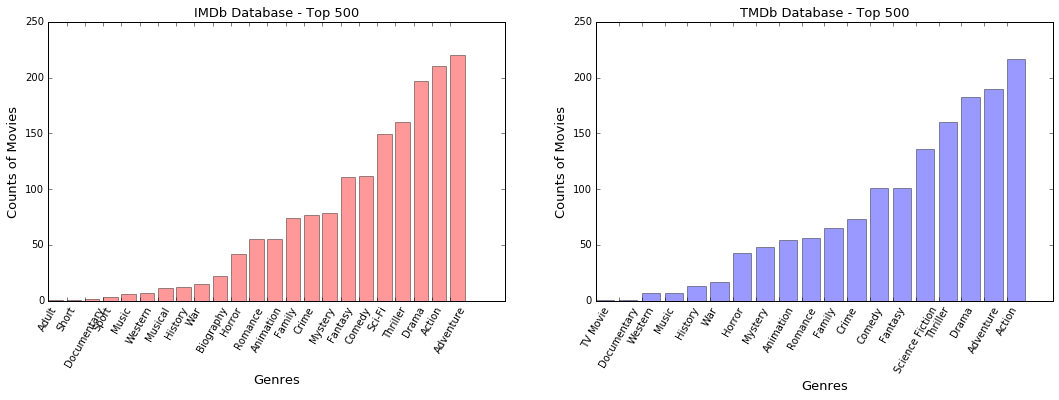

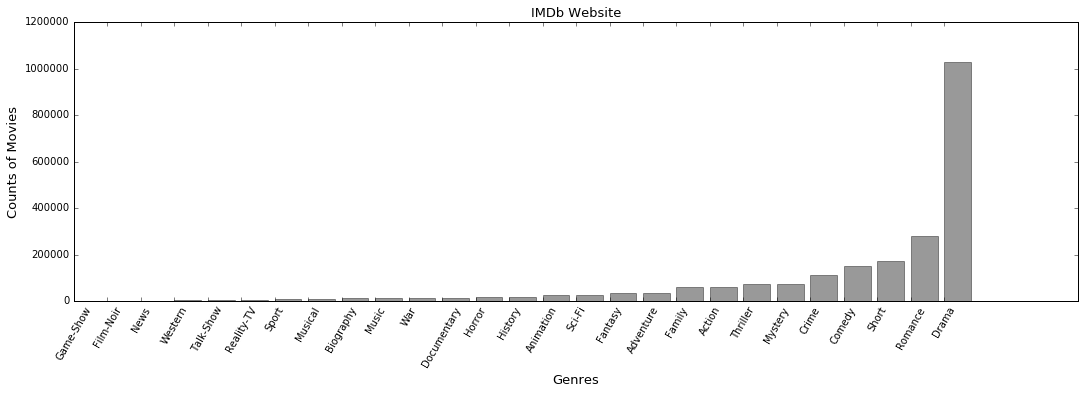

In [242]:
plt.figure(figsize = (18,5))

# IMDB
plt.subplot(1,2,1)
top500_IMDB_genre_count.sort()
plt.bar(np.arange(0,top500_IMDB_genre_count.shape[0]), 
        top500_IMDB_genre_count.values, color = "red", alpha = 0.4)
plt.xticks(np.arange(0,top500_IMDB_genre_count.shape[0]), 
           top500_IMDB_genre_count.index, rotation = 60)
plt.xlabel("Genres", fontsize = 13)
plt.ylabel("Counts of Movies", fontsize = 13)
plt.title("IMDb Database - Top 500", fontsize = 13)

# TMDB
plt.subplot(1,2,2)
top500_TMDB_genre_count.sort()
plt.bar(np.arange(0,top500_TMDB_genre_count.shape[0]), 
        top500_TMDB_genre_count.values, color = "blue", alpha = 0.4)
plt.xticks(np.arange(0,top500_TMDB_genre_count.shape[0]), 
           top500_TMDB_genre_count.index, rotation = 60)
plt.xlabel("Genres", fontsize = 13)
plt.ylabel("Counts of Movies", fontsize = 13)
plt.title("TMDb Database - Top 500", fontsize = 13)

plt.show()

# IMDB website
plt.figure(figsize = (18,5))
top500_IMDB_web = top500_IMDB_web.sort("Count")
plt.bar(np.arange(0,top500_IMDB_web.shape[0]), 
        top500_IMDB_web['Count'], color = "black", alpha = 0.4)
plt.xticks(np.arange(0,top500_IMDB_web.shape[0]), 
           top500_IMDB_web['Genre'], rotation = 60)
plt.xlabel("Genres", fontsize = 13)
plt.ylabel("Counts of Movies", fontsize = 13)
plt.title("IMDb Website", fontsize = 13)
plt.show()

We can see that the ranks and distributions of genres between IMDB and TMDB are similar, with slight differences.

While when we look at the distribution of the IMDB website (which samples a much larger population rather than the top 500 movies only), and ranks are quite different (with `Drama` and `Romance` ranking first and second). 

This illustrates how we should sample more randomely for the training data to be representative. It also points out that the data is quite unbasied between different genres, and needs to be taken into consideration when building our models.

#### Q. How many genre labels for each movie?
Check the differences between the two information sources: IMDB database, TMDB database.

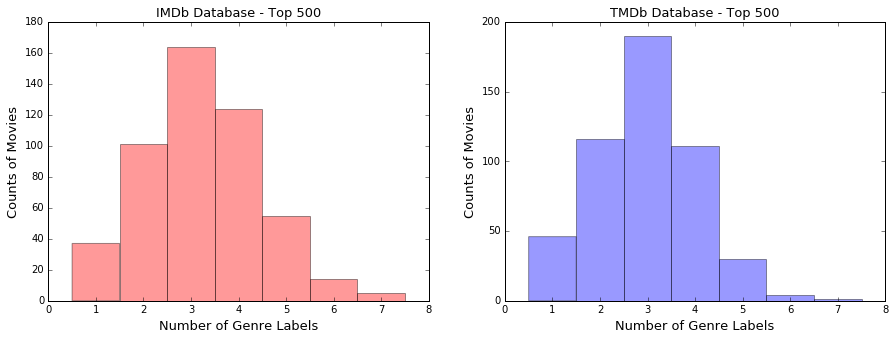

In [243]:
## number of genres for each movie, saved in variable 'n_genre'
plt.figure(figsize = (15,5))
 
    # IMDB
plt.subplot(1, 2, 1)
plt.hist(top500_IMDB_genre.iloc[:,:-1].sum(axis = 1), 
         bins = np.arange(0.5,8.5), color = "red", alpha = 0.4)
plt.xlabel("Number of Genre Labels", fontsize = 13)
plt.ylabel("Counts of Movies", fontsize = 13)
plt.title("IMDb Database - Top 500", fontsize = 13)
    # TMDB
plt.subplot(1, 2, 2)
plt.hist(top500_TMDB_genre.iloc[:,:-1].sum(axis = 1), 
         bins = np.arange(0.5,8.5), color = "blue", alpha = 0.4)
plt.xlabel("Number of Genre Labels", fontsize = 13)
plt.ylabel("Counts of Movies", fontsize = 13)
plt.title("TMDb Database - Top 500", fontsize = 13)

#plt.suptitle("Distribution of Number of Genres Per Movie", fontsize = 15)

plt.show()

We can see that most movies have around 2 to 4 labels, and the two distributions are quite similar between IMDB and TMDB database.

---
#### 2.1.2 Heatmap between genrens

In [ ]:
###  Zecai

### 2.2 Genre vs Other Variables

#### 2.2.1 Quantitative:
- year of release
- rating
- voting
- runtime
- production cost

In [ ]:
# Danqing

#### 2.2.2 Qualitative:
- language
- country of release
- MAPP   

In [ ]:
# Zecai

#### 2.2.3 Production related:
- director
- writer
- distributor (company)
- major cast

In [1]:
# (1 sample) Wenshan

#### 2.2.4 Text Analysis:
- plot outline
- plot
- title
- reason for MPAA rating

In [2]:
# not now

--------

## 3. Challenges for Next Step 

Hints:
Comments on what challenges you see for predicting movie genre based on the data you have, and how to address them

Zecai
- multiple genres / how many genres to predict
- assemble data (how much to sample? download the whole?

Danqing
- missing information / sparse data for some genres
- merge/combine two database (inconsistency)

Wenshan
- feature selection? 
- whether text analysis?